In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

from dagmm import DAGMM
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from PIL import Image

import os

In [4]:
img0 = Image.open('./data/Class1/1.png')

In [5]:
np_img0 = np.asarray(img0)
print(np_img0)

[[ 77 107 175 ... 124  75  95]
 [178  76 182 ... 179  75 131]
 [144 109 134 ... 161  68 174]
 ...
 [ 82 103 106 ...  83 112 112]
 [187 132 134 ...  73  78  96]
 [119  91 116 ...  25 131 106]]


In [6]:
np_img0.shape, np_img0.dtype

((512, 512), dtype('uint8'))

In [7]:
root = './data/Class1/'
fnames = os.listdir(root)

In [8]:
np_imgs = []
for fname in fnames:
    im = Image.open(os.path.join(root, fname))
    np_imgs.append(np.asarray(im))
np_imgs = np.asarray(np_imgs)

In [9]:
np_imgs = np_imgs.astype(np.float64)
# np_imgs /= 255.

(array([7.6270380e+06, 6.2228484e+07, 9.6561401e+07, 6.0207861e+07,
        2.5487750e+07, 7.5111040e+06, 2.0007630e+06, 4.2233900e+05,
        8.3812000e+04, 1.3448000e+04]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

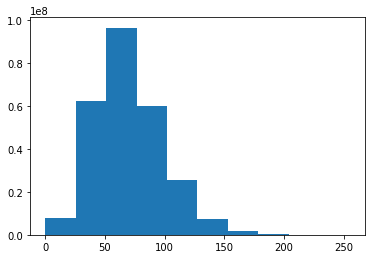

In [10]:
plt.hist(np_imgs.reshape(-1))

In [11]:
np_imgs_mean = np_imgs.mean(axis=0)
np_imgs_var = np_imgs.var(axis=0)
np_imgs = (np_imgs - np_imgs_mean) / np.sqrt(np_imgs_var)
np_imgs = np_imgs.astype(np.float64)

In [12]:
np_imgs = np_imgs.reshape(-1, 512*512)

(array([3.55530900e+06, 6.17739330e+07, 1.05750759e+08, 6.36652760e+07,
        2.15434040e+07, 4.93162700e+06, 8.14230000e+05, 9.93920000e+04,
        9.31100000e+03, 7.59000000e+02]),
 array([-2.76617464, -1.74741778, -0.72866091,  0.29009595,  1.30885281,
         2.32760968,  3.34636654,  4.3651234 ,  5.38388027,  6.40263713,
         7.421394  ]),
 <a list of 10 Patch objects>)

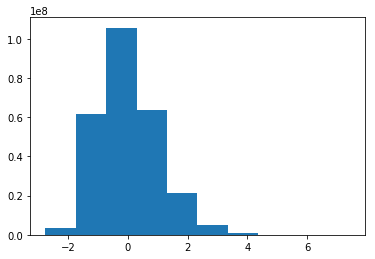

In [13]:
plt.hist(np_imgs.reshape(-1))

In [14]:
np_imgs.shape, np_imgs.dtype

((1000, 262144), dtype('float64'))

In [15]:
np_imgs = np_imgs.reshape(-1, 512*512)

In [34]:
tf.reset_default_graph()

In [35]:
n1 = 2
n2 = 2
n3 = 1
model_dagmm = DAGMM(
    comp_hiddens=[n1*n1,n2*n2], comp_activation=tf.nn.tanh,
    est_hiddens=[n2*n2,n3*n3], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=1000, minibatch_size=1
)

In [36]:
model_dagmm.fit(np_imgs[:100])

<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(1, 6) dtype=float64>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(1, 6, 6) dtype=float64>)
Tensor("GMM/truediv_1:0", shape=(1, 6, 6), dtype=float64)
Tensor("GMM/mul_1:0", shape=(6, 6), dtype=float64)
Tensor("GMM_energy/Log_2:0", shape=(1, 1), dtype=float64)
Tensor("GMM_energy/mul_2:0", shape=(1, ?), dtype=float64)
Tensor("GMM_energy/Cast_2:0", shape=(), dtype=float64)
Tensor("GMM_energy/strided_slice_3:0", shape=(1, 1), dtype=float64)


InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]

Caused by op 'GMM/Cholesky', defined at:
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-acf32c015c3b>", line 1, in <module>
    model_dagmm.fit(np_imgs[:100])
  File "/home/genta/github/DAGMM/dagmm/dagmm.py", line 119, in fit
    self.gmm.fit(z, gamma, input)
  File "/home/genta/github/DAGMM/dagmm/gmm.py", line 68, in fit
    self.L = tf.cholesky(sigma + min_vals[None,:,:])
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 709, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]


コレスキー分解でコケる

コレスキー分解を用いたGMM（同じ作者）
https://qiita.com/ToshihiroNakae/items/55d51e0f8ca48ae0d913

コレスキー分解でコケる要因
https://github.com/ICL-SML/Doubly-Stochastic-DGP/issues/9#issuecomment-371167725

In [20]:
tf.enable_eager_execution()

ValueError: tf.enable_eager_execution must be called at program startup.

In [18]:
np_imgs_mean = np_imgs.mean(axis=0)
np_imgs_var = np_imgs.var(axis=0)
np_imgs = (np_imgs - np_imgs_mean) / np.sqrt(np_imgs_var)
np_imgs = np_imgs.astype(np.float64)

(array([3.55530900e+06, 6.17739330e+07, 1.05750759e+08, 6.36652760e+07,
        2.15434040e+07, 4.93162700e+06, 8.14230000e+05, 9.93920000e+04,
        9.31100000e+03, 7.59000000e+02]),
 array([-2.76617464, -1.74741778, -0.72866091,  0.29009595,  1.30885281,
         2.32760968,  3.34636654,  4.3651234 ,  5.38388027,  6.40263713,
         7.421394  ]),
 <a list of 10 Patch objects>)

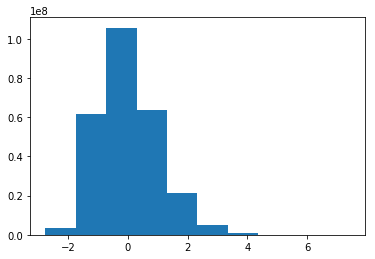

In [22]:
plt.hist(np_imgs.reshape(-1))

In [19]:
tf.reset_default_graph()

In [20]:
n1 = 2
n2 = 2
n3 = 1
model_dagmm = DAGMM(
    comp_hiddens=[n1*n1,n2*n2], comp_activation=tf.nn.tanh,
    est_hiddens=[n2*n2,n3*n3], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=1000, minibatch_size=1
)

model_dagmm.fit(np_imgs[:100])

<class 'tensorflow.python.framework.tensor_shape.Dimension'>


TypeError: Input 'y' of 'Add' Op has type float32 that does not match type float64 of argument 'x'.